In [1]:
# import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from numpy.linalg import LinAlgError
from functools import partial
from scipy.optimize import minimize





228
228


C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3873561189.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


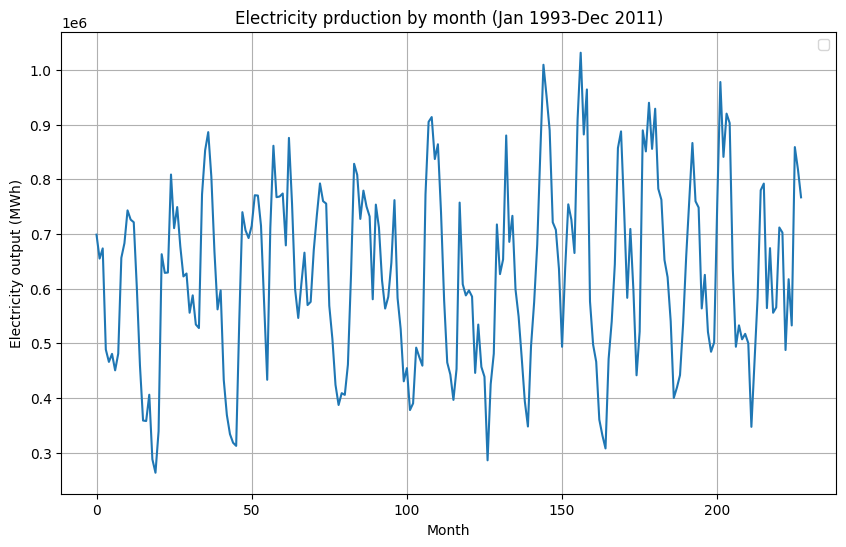

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3873561189.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


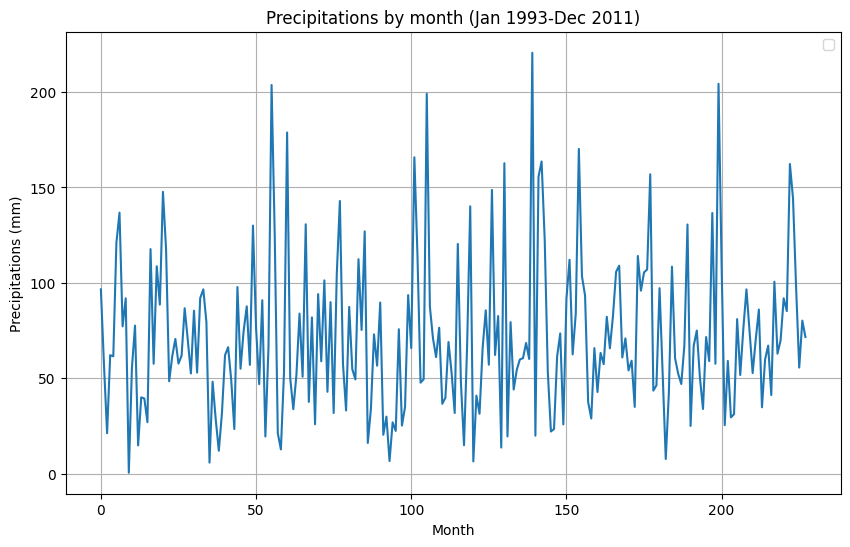

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3873561189.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


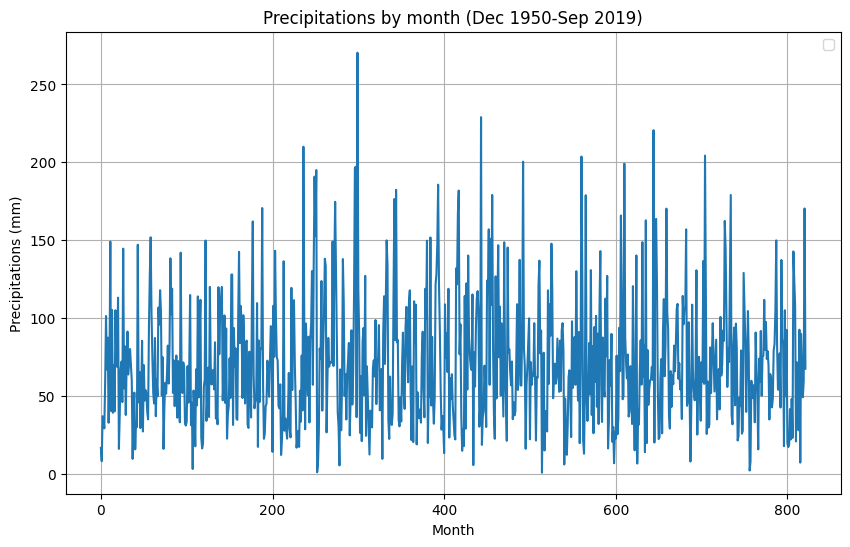

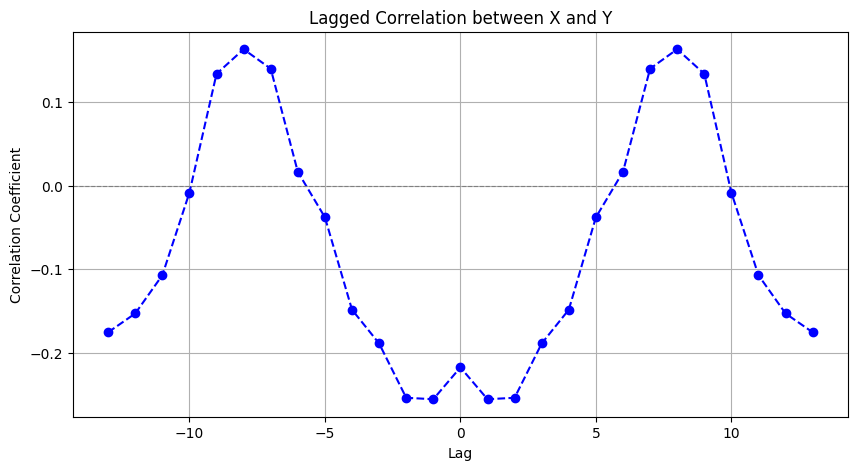

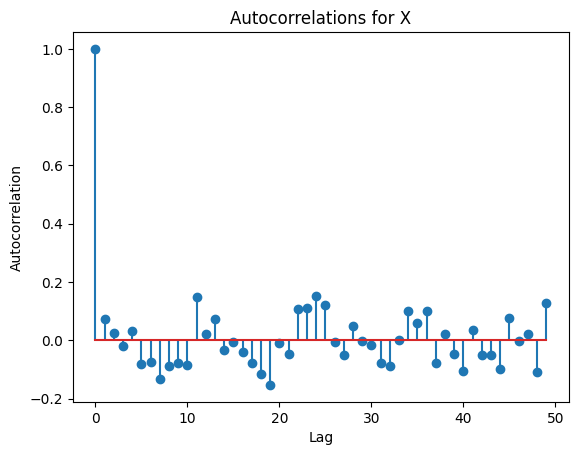

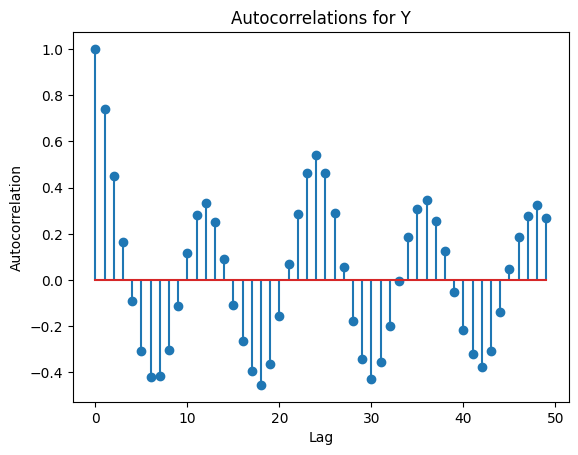

In [ ]:
# IMPORTING DATA AND PLOTTING
# importing electricity production 
# (monthly from January 1993 to December 2011) 228 values 
electricity_production_data = pd.read_csv("electricity_production_data.csv")
electricity_production_data.columns = ['month', 'electricity_output']

# importing weather 
# (monthly from December 1950 to September 2019) 822 values
precipitation_data=pd.read_csv("weather_data.csv")
precipitation_data.columns=['month','precipitation']

# we can consider precipitations X as an independent process wrt electricity output Y
# therefore first we can try to model the dynamics of X(t)=f(X(t-1),...,W(t),W(t-1),...)
# then we can model Y(t)=g(Y(t-1),...,X(t),X(t-1),...,U(t),U(t-1),...)
X_total=precipitation_data.loc[:,'precipitation'].tolist()
X=X_total[505:733]
print(len(X))
#X=[x * 10**(-6) for x in X] 
Y=electricity_production_data.loc[:,'electricity_output'].tolist()
print(len(Y))
# plotting Y from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(Y)
plt.title('Electricity prduction by month (Jan 1993-Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Electricity output (MWh)')
plt.legend()
plt.grid(True)
plt.show()

# plotting X from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(X)
plt.title('Precipitations by month (Jan 1993-Dec 2011)')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()

# plotting X total
plt.figure(figsize=(10, 6))
plt.plot(X_total)
plt.title('Precipitations by month (Dec 1950-Sep 2019)')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Convert to pandas Series for easy shifting
X_s = pd.Series(X)
Y_s = pd.Series(Y)
# Define a range of lags
max_lag = 13
lags = range(-max_lag, max_lag + 1)

# Compute correlations
correlations = []
for lag in lags:
    if lag < 0:
        shifted_Y = Y_s.shift(-lag)  
    else:
        shifted_Y = Y_s.shift(lag)  
    corr = X_s.corr(shifted_Y) 
    correlations.append(corr)

# Plot X,Y correlations
plt.figure(figsize=(10, 5))
plt.plot(lags, correlations, marker='o', linestyle='--', color='b')
plt.title('Lagged Correlation between X and Y')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)
plt.show()

def autocorrelation(data, lag):
    n = len(data)
    mean = sum(data) / n
    numerator = sum((data[i] - mean) * (data[i + lag] - mean) for i in range(n - lag))
    denominator = sum((x - mean) ** 2 for x in data)
    return numerator / denominator

# Calculate autocorrelation for multiple lags
lags = 50 # Maximum lags
autocorrelations = [autocorrelation(X, lag) for lag in range(lags)]

# Plot the autocorrelation
plt.stem(range(lags), autocorrelations)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelations for X")
plt.show()

# Calculate autocorrelation for multiple lags
lags = 50 # Maximum lags
autocorrelations = [autocorrelation(Y, lag) for lag in range(lags)]

# Plot the autocorrelation
plt.stem(range(lags), autocorrelations)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelations for Y")
plt.show()


C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1959115985.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


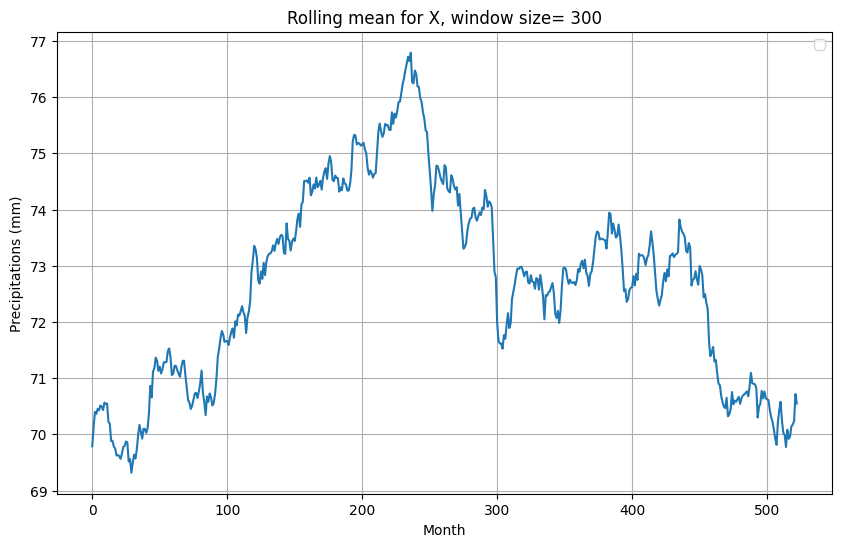

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1959115985.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


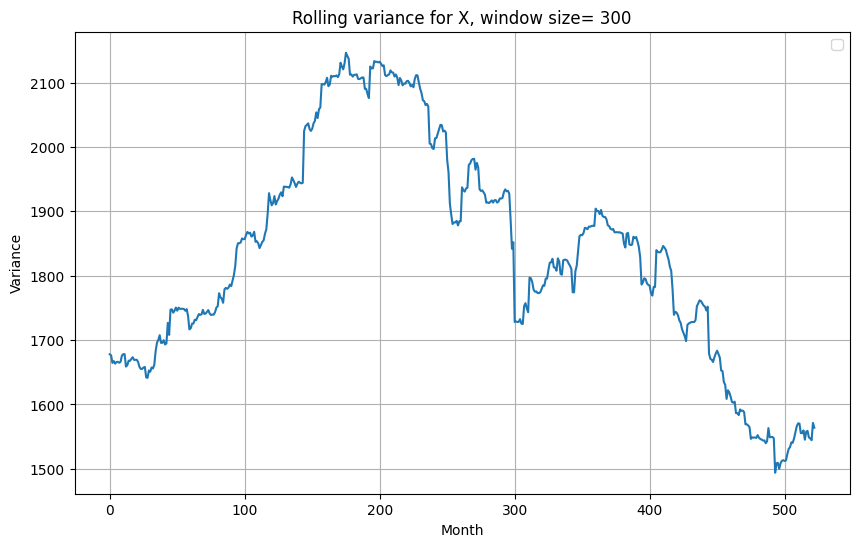

In [3]:
# EXPLORATORY DATA ANALYSIS
# stationarity analysis
# rolling mean
def rolling_mean_and_variance(data, window_size):
    
    rolling_means = []
    rolling_variances = []

    for i in range(len(data) - window_size + 1):
        # Extract the current window
        window = data[i:i + window_size]
        
        # Calculate mean for the current window
        mean = sum(window) / window_size
        rolling_means.append(mean)

        # Calculate variance for the current window
        variance = sum((x - mean) ** 2 for x in window) / window_size
        rolling_variances.append(variance)

    return rolling_means, rolling_variances

# Example usage
# differencing
def diff(time_series):
    differenced_time_series=[]
    length=len(time_series)-1
    for i in range(length):
        differenced_time_series.append(time_series[i+1]-time_series[i])
    return differenced_time_series

# de-differencing
def de_diff(differenced_time_series,initial_value):
    original_time_series=[initial_value]
    length=len(differenced_time_series)
    for i in range(length):
        original_time_series.append(differenced_time_series[i])
    return original_time_series

# seasonal differencing
# differencing
def seasonal_diff(time_series,s):
    differenced_time_series=[]
    length=len(time_series)-s
    for i in range(length):
        differenced_time_series.append(time_series[i+s]-time_series[i])
    return differenced_time_series


window_size = 300

# rolling means and variance for X
means_X, variances_X = rolling_mean_and_variance(X_total, window_size)
# rolling means and variance for Y
means_Y, variances_Y = rolling_mean_and_variance(X_total, window_size)

# plotting rolling mean and variance for X from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(means_X)
plt.title(f'Rolling mean for X, window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(variances_X)
plt.title(f'Rolling variance for X, window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()




C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3023823223.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


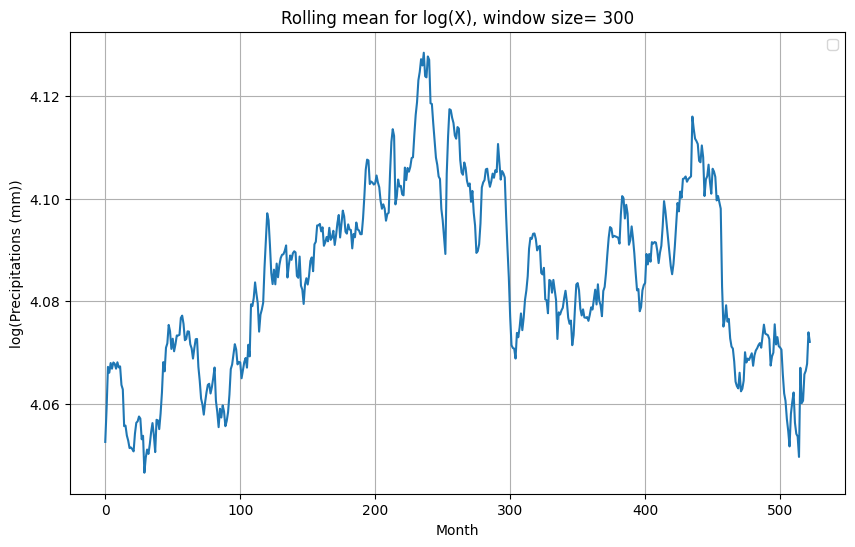

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3023823223.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


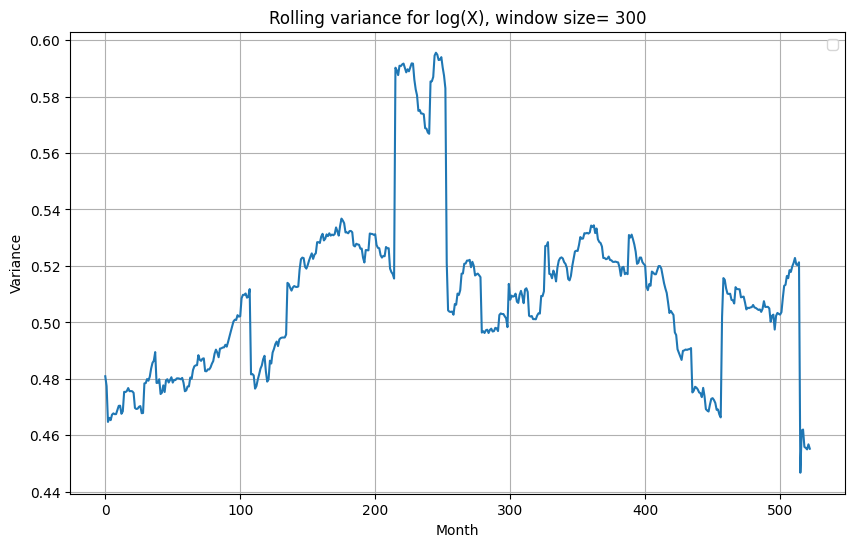

In [4]:

# log transformation for variance stabilization
Z1=[np.log(x) for x in X_total]
# rolling means and variance for X
means_Z1, variances_Z1 = rolling_mean_and_variance(Z1, window_size)
# rolling means and variance for Y
means_Z1, variances_Z1 = rolling_mean_and_variance(Z1, window_size)

# plotting rolling mean and variance for X from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(means_Z1)
plt.title(f'Rolling mean for log(X), window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('log(Precipitations (mm))')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(variances_Z1)
plt.title(f'Rolling variance for log(X), window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()




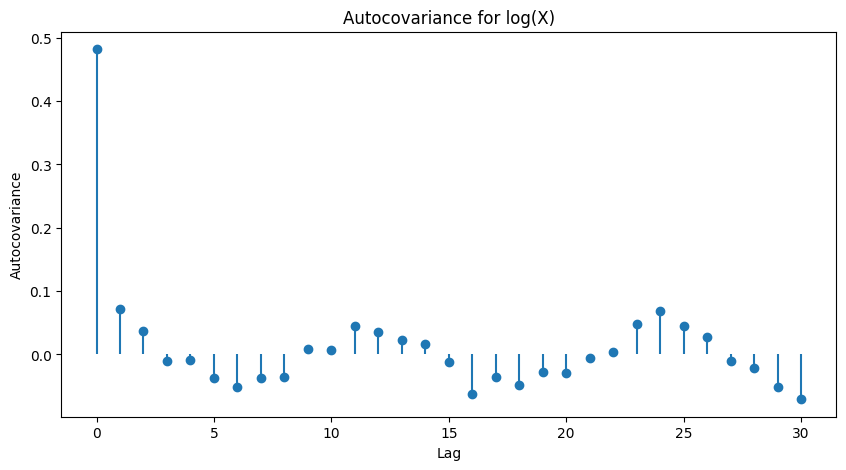

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1504637121.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


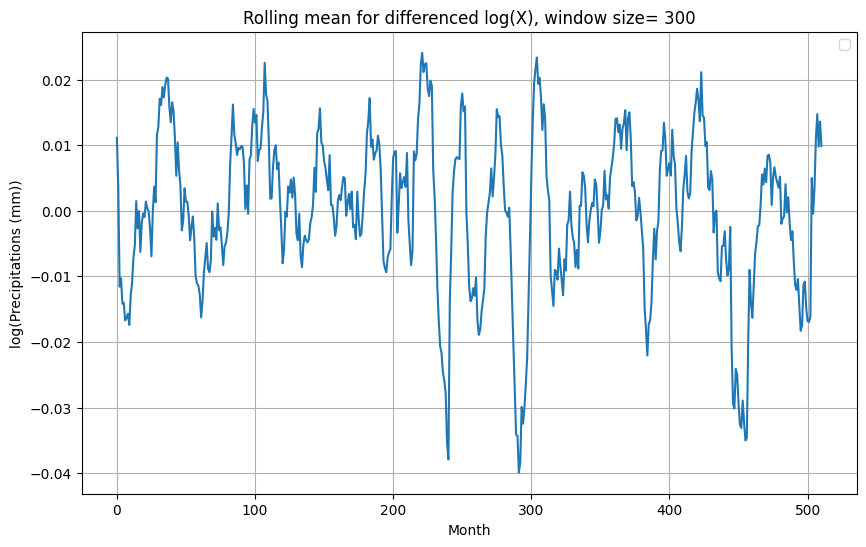

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1504637121.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


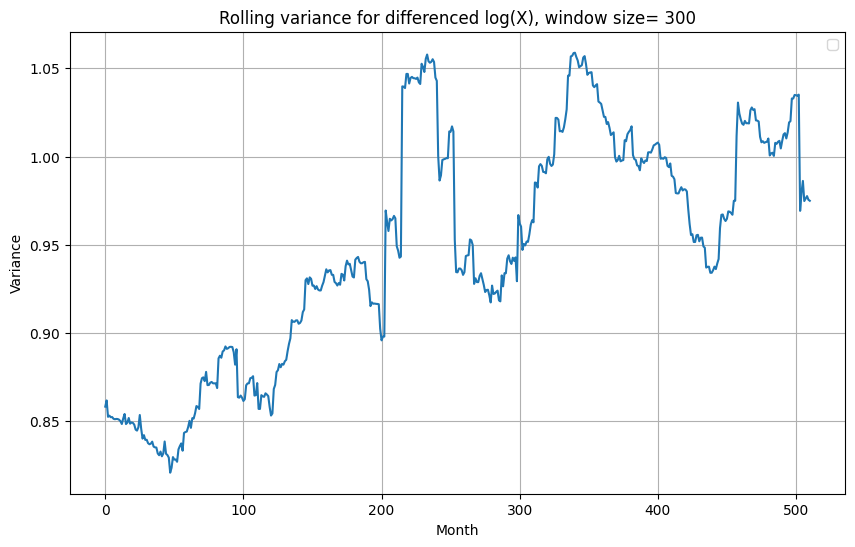

In [55]:
# SEASONALITY ANALYSIS

def autocovariance(data, lag):
    n = len(data)
    mean_data = np.mean(data)
    cov = 0.0
    for i in range(n - lag):
        cov += (data[i] - mean_data) * (data[i + lag] - mean_data)
    return cov / n

# Calculate the autocovariance for a range of lags
max_lag = 30
autocovariances = [autocovariance(Z1, lag) for lag in range(max_lag + 1)]

# Plot the autocovariance function
plt.figure(figsize=(10, 5))
plt.stem(range(max_lag + 1), autocovariances, basefmt=" ")
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.title("Autocovariance for log(X)")
plt.show()

# seasonal differencing (12 months)
Z3=seasonal_diff(Z1,12)
# rolling means and variance for X
means_Z3, variances_Z3 = rolling_mean_and_variance(Z3, window_size)


# plotting rolling mean and variance for X from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(means_Z3)
plt.title(f'Rolling mean for differenced log(X), window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('log(Precipitations (mm))')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(variances_Z3)
plt.title(f'Rolling variance for differenced log(X), window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# polynomial multiplication
class Polynomial:
    def __init__(self, coefficients):
        self.coefficients = coefficients

    def __call__(self, x):
        result = 0
        for power, coef in enumerate(self.coefficients):
            result += coef * (x ** power)
        return result

    def degree(self):
        return len(self.coefficients)-1
    def __mul__(self,other):
        if isinstance(other,Polynomial):
            # generating the new polynomial instance
            
            length=other.degree()+self.degree()+1
            new_coefficients=np.zeros(length)
            for i in range(other.degree()+1):
                for j in range(self.degree()+1):
                    new_coefficients[i+j]+=other.coefficients[i]*self.coefficients[j]
            coefficients_list=new_coefficients.tolist()
            # reducing polynomial order
            while coefficients_list and coefficients_list[-1] == 0:
                coefficients_list.pop()
            return Polynomial(coefficients_list)
            
        else:
            raise TypeError("Multiplication supported only for poly-poly")
    def __pow__(self,power):
        result=Polynomial([1])
        if power>0:
            for i in range(power):
                result=self*result
        return result


# Example usage:
lizt=[1,-2,3]

s=2
seasonal_lizt=[0]*((len(lizt)-1)*s+1)
for i in range(len(lizt)):
    seasonal_lizt[i*s]=lizt[i]

print(seasonal_lizt)



[1, 0, -2, 0, 3]


In [7]:
# State Space Model
class StateSpaceModel:
    def __init__(self,F,H,V1,V2,V12,b,d):
        self.F=F
        self.H=H
        self.V1=V1
        self.V2=V2
        self.V12=V12
        self.b=b
        self.d=d
    def kalman_prediction(self,X_0,P_0,Y_series):
        X_t=X_0
        P_t=P_0
        predictions=[]
        for y in Y_series:
            step1=(self.F@P_t@self.H.T+self.V12)
            step2=safe_pseudo_inverse(self.H@P_t@self.H.T+self.V2)
            K_t=step1@step2                                                                                                 
            X_t=self.F@X_t+self.b+K_t@(y-self.H@X_t-self.d)
            P_t=(self.F@P_t@self.F.T+self.V1)-(self.F@P_t@self.H.T+self.V12)@safe_pseudo_inverse(self.H@P_t@self.H.T+self.V2)@((self.F@P_t@self.H.T+self.V12).T)
            predictions.append(self.H@X_t)
        return predictions
    def dim(self):
        return len(self.F)
# safe pseudo inverse
def safe_pseudo_inverse(S,epsilon=1e-6):
    cond_num = np.linalg.cond(S)
    if(cond_num>1e5):
        S=S+epsilon*np.eye(S.shape[0])
    
    return np.linalg.pinv(S)

    

In [8]:
# Arma
class Arma:
    def __init__(self,p,q):
        self.p=p
        self.q=q
        self.parameters=np.zeros(p+q+1).tolist()
    def predictions(self,parameters,Y_train):
        sum=0
        representation=StateSpaceModel(*self.state_space_representation(parameters))
        # diffuse initialization
        dim=representation.dim()
        X_0=np.zeros((dim,1))
        P_0=np.eye(dim)*(10**6)
        preds=representation.kalman_prediction(X_0,P_0,Y_train)
        return preds
    
    def fit(self,Y_train):
        # parameter initialization
        parameters_0=np.zeros(self.p+self.q+1).tolist()
        parameters_0[-1]=0.01
   

        # loss function definition
        def Loss(parameters):
            preds=self.predictions(parameters,Y_train[:-1])
            actual=Y_train[1:]
            return sum((x - y) ** 2 for x, y in zip(preds, actual))/len(preds)
        # minimization of the loss
        result = minimize(Loss,parameters_0,method='Powell')
        self.parameters=result.x
    
    # delivers state space representation of the arma model (numpy matrices)
    def state_space_representation(self,parameters):
        dim=max(self.p,self.q+1)
        if self.p+self.q+1!=len(parameters):
            raise Exception("Error message here")
        else:
            # F construction
            F=np.zeros((dim,dim))
            F[1:dim,0:dim-1]=np.eye(dim-1)
            F[0,:self.p]=parameters[:self.p]
            # H  construction
            H=np.zeros((1,dim))
            H[0,0]=1
            H[0,1:self.q+1]=parameters[self.p:self.p+self.q]
            # V1 construction
            V1=np.zeros((dim,dim))
            V1[0,0]=parameters[-1]**2
            # V2 construction
            V2=np.zeros((1,1))
            # V12 construction
            V12=np.zeros((dim,1))
            # b construction
            b=np.zeros((dim,1))
            # d construction
            d=0
            return (F,H,V1,V2,V12,b,d)


   






In [9]:
# Polynomial Arma
class Sarima:
    # initialization with polynomials
    def __init__(self,p,q,d,P,Q,D,s):
        self.p=p
        self.q=q
        self.P=P
        self.Q=Q
        self.d=d
        self.D=D
        self.s=s
        # packed parameters
        self.parameters=np.zeros(p+q+Q+P+1).tolist()
    def predictions(self,parameters,Y_train):
        sum=0
        representation=StateSpaceModel(*self.state_space_representation(parameters))
        # diffuse initialization
        dim=representation.dim()
        X_0=np.zeros((dim,1))
        P_0=np.eye(dim)*(10**4)
        preds=representation.kalman_prediction(X_0,P_0,Y_train)
        return preds
    
    def fit(self,Y_train):
        # parameter initialization
        parameters_0=np.random.rand(len(self.parameters)).tolist()
        
   

        # loss function definition
        def Loss(parameters):
            landa=0.00001

        
            preds=self.predictions(parameters,Y_train[:-1])
            actual=Y_train[1:]
            return sum((x - y) ** 2 for x, y in zip(preds, actual))/len(preds)

        # minimization of the loss
        result = minimize(Loss,parameters_0,method='Powell')
        self.parameters=result.x
        return Loss(self.parameters)
    
    # delivers state space representation of the arma model (numpy matrices)
    def state_space_representation(self,parameters):
        # phi
        phi=Polynomial([1]+parameters[:self.p].tolist())
        
        # theta
        theta=Polynomial([1]+parameters[self.p:self.p+self.d].tolist())
        # Phi
        
        Phi_list=[1]+parameters[self.p+self.d:self.p+self.d+self.P].tolist()
        # seasonal_Phi_poly
        seasonal_Phi_list=[0]*((len(Phi_list)-1)*self.s+1)
        for i in range(len(Phi_list)):
            seasonal_Phi_list[i*self.s]=Phi_list[i]
        Phi=Polynomial(seasonal_Phi_list)
       
        # Theta
        Theta_list=[1]+parameters[self.p+self.d+self.P:self.p+self.d+self.P+self.Q].tolist()
        # seasonal_Theta_poly
        seasonal_Theta_list=[0]*((len(Theta_list)-1)*self.s+1)
        for i in range(len(Theta_list)):
            seasonal_Theta_list[i*self.s]=Theta_list[i]
        Theta=Polynomial(seasonal_Theta_list)
        # sigma
        sigma=parameters[-1]
        # diff_poly
        diff_list=[1,-1]
        diff_poly=Polynomial(diff_list)
        # seasonal_diff_poly
        seasonal_diff_list=[0]*((len(diff_list)-1)*self.s+1)
        for i in range(len(diff_list)):
            seasonal_diff_list[i*self.s]=diff_list[i]
        seasonal_diff_poly=Polynomial(seasonal_diff_list)
        # left polynomial
        left_poly=phi*Phi*(diff_poly**self.d)*(seasonal_diff_poly**self.D)
        # right polynomial
        right_poly=theta*Theta
        dim=max(left_poly.degree(),right_poly.degree()+1)
        # F construction
        F=np.zeros((dim,dim))
        F[1:dim,0:dim-1]=np.eye(dim-1)
        original=left_poly.coefficients[1:]
        F[0,:left_poly.degree()]=[-x for x in original]
        # H  construction
        H=np.zeros((1,dim))
        H[0,0]=1
        H[0,1:right_poly.degree()+1]=right_poly.coefficients[1:]
        # V1 construction
        V1=np.zeros((dim,dim))
        V1[0,0]=sigma**2
        # V2 construction
        V2=np.zeros((1,1))
        # V12 construction
        V12=np.zeros((dim,1))
        # b construction
        b=np.zeros((dim,1))
        # d construction
        d=0
        return (F,H,V1,V2,V12,b,d)


In [11]:
# SARIMAX
class Sarimax:
    # initialization with polynomials
    def __init__(self,p,q,d,P,Q,D,s,k):
        self.p=p
        self.q=q
        self.P=P
        self.Q=Q
        self.d=d
        self.D=D
        self.s=s
        self.k=k
        # packed parameters
        self.parameters=np.zeros(p+q+Q+P+k+1).tolist()
    def predictions(self,parameters,Y_train,X_train):
        sum=0
        representation=StateSpaceModel(*self.state_space_representation(parameters))
        # diffuse initialization
        dim=representation.dim()
        X_0=np.zeros((dim,1))
        P_0=np.eye(dim)*(10**4)
        preds=representation.kalman_prediction(X_0,P_0,Y_train)

        # exogenous input
        betas=parameters[-self.k:]
        U_train=[0]*self.k
        for i in range(len(X_train)-self.k):
            us=X_train[i:i+self.k]
            
            sum=0
            for j in range(self.k):

                sum+=us[j]*betas[j]
            U_train.append(sum)

        
        return [preds[i]+U_train[i] for i in range(len(preds))]
    
    def fit(self,Y_train,X_train):
        # parameter initialization
        parameters_0=np.random.rand(len(self.parameters)).tolist()
        
        
   

        # loss function definition
        def Loss(parameters):
            landa=0.00001
            preds=self.predictions(parameters,Y_train[:-1],X_train[1:])
            actual=Y_train[1:]

            
            
            return sum((x - y) ** 2 for x, y in zip(preds, actual))/len(preds)

        # minimization of the loss
        result = minimize(Loss,parameters_0,method='Powell')
        self.parameters=result.x
        return Loss(self.parameters)
    
    # delivers state space representation of the arma model (numpy matrices)
    def state_space_representation(self,parameters):
        # phi
        phi=Polynomial([1]+parameters[:self.p].tolist())
        
        # theta
        theta=Polynomial([1]+parameters[self.p:self.p+self.d].tolist())
        # Phi
        
        Phi_list=[1]+parameters[self.p+self.d:self.p+self.d+self.P].tolist()
        # seasonal_Phi_poly
        seasonal_Phi_list=[0]*((len(Phi_list)-1)*self.s+1)
        for i in range(len(Phi_list)):
            seasonal_Phi_list[i*self.s]=Phi_list[i]
        Phi=Polynomial(seasonal_Phi_list)
       
        # Theta
        Theta_list=[1]+parameters[self.p+self.d+self.P:self.p+self.d+self.P+self.Q].tolist()
        # seasonal_Theta_poly
        seasonal_Theta_list=[0]*((len(Theta_list)-1)*self.s+1)
        for i in range(len(Theta_list)):
            seasonal_Theta_list[i*self.s]=Theta_list[i]
        Theta=Polynomial(seasonal_Theta_list)
        # sigma
        sigma=parameters[self.p+self.d+self.P+self.Q]
        # diff_poly
        diff_list=[1,-1]
        diff_poly=Polynomial(diff_list)
        # seasonal_diff_poly
        seasonal_diff_list=[0]*((len(diff_list)-1)*self.s+1)
        for i in range(len(diff_list)):
            seasonal_diff_list[i*self.s]=diff_list[i]
        seasonal_diff_poly=Polynomial(seasonal_diff_list)
        # left polynomial
        left_poly=phi*Phi*(diff_poly**self.d)*(seasonal_diff_poly**self.D)
        # right polynomial
        right_poly=theta*Theta
        dim=max(left_poly.degree(),right_poly.degree()+1)
        # F construction
        F=np.zeros((dim,dim))
        F[1:dim,0:dim-1]=np.eye(dim-1)
        original=left_poly.coefficients[1:]
        F[0,:left_poly.degree()]=[-x for x in original]
        # H  construction
        H=np.zeros((1,dim))
        H[0,0]=1
        H[0,1:right_poly.degree()+1]=right_poly.coefficients[1:]
        # V1 construction
        V1=np.zeros((dim,dim))
        V1[0,0]=sigma**2
        # V2 construction
        V2=np.zeros((1,1))
        # V12 construction
        V12=np.zeros((dim,1))
        # b construction
        b=np.zeros((dim,1))
        # d construction
        d=0
        return (F,H,V1,V2,V12,b,d)

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1229565173.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_predicted = [float(x) for x in a]
C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1229565173.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


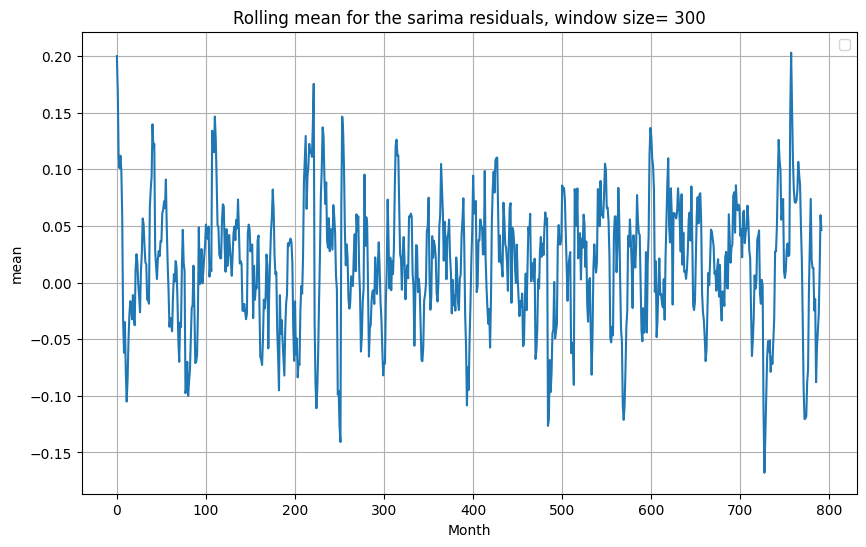

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1229565173.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


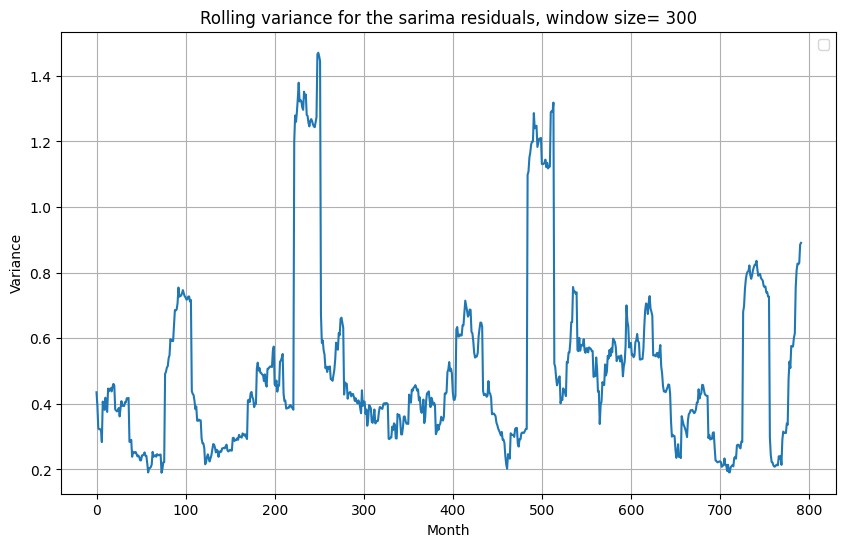

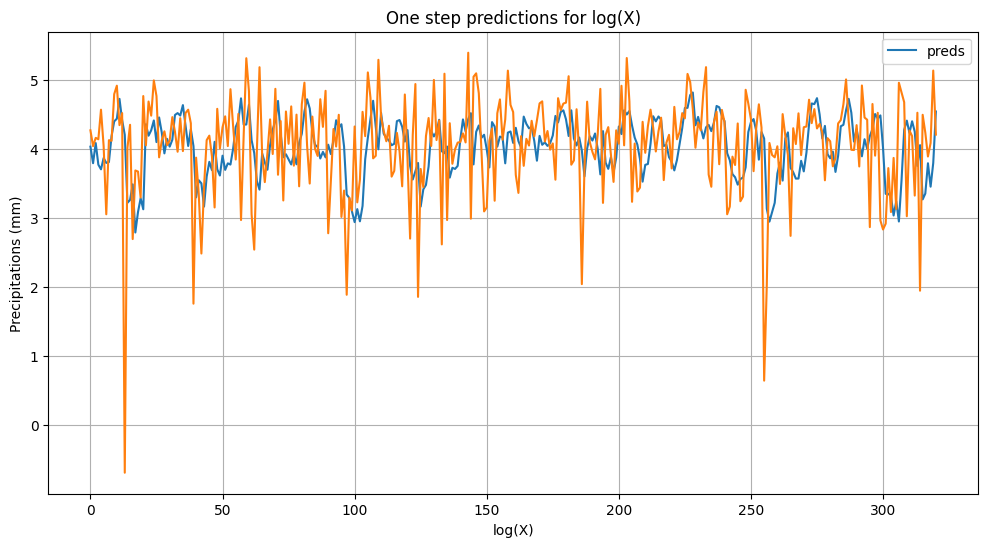

Iteration:      1,   Func. Count:     16,   Neg. LLF: 4073.9116554670486
Iteration:      2,   Func. Count:     34,   Neg. LLF: 3219.7508280613392
Iteration:      3,   Func. Count:     52,   Neg. LLF: 8606343.986912183
Iteration:      4,   Func. Count:     70,   Neg. LLF: 890.099341594634
Iteration:      5,   Func. Count:     85,   Neg. LLF: 890.372571505836
Iteration:      6,   Func. Count:    101,   Neg. LLF: 908.0310751976372
Iteration:      7,   Func. Count:    117,   Neg. LLF: 900.6510707209495
Iteration:      8,   Func. Count:    133,   Neg. LLF: 920.3140441836606
Iteration:      9,   Func. Count:    149,   Neg. LLF: 890.6672465602917
Iteration:     10,   Func. Count:    165,   Neg. LLF: 889.2111124649566
Iteration:     11,   Func. Count:    180,   Neg. LLF: 895.9101211723387
Iteration:     12,   Func. Count:    196,   Neg. LLF: 889.3959413431987
Iteration:     13,   Func. Count:    212,   Neg. LLF: 889.1814440385054
Iteration:     14,   Func. Count:    227,   Neg. LLF: 889.170576

In [ ]:
# CALIBRATION OF A SARIMA - GARCH MODEL FOR log(X)
# log of X total
X_logged=[np.log(x) for x in X_total]
# Sarima for prediction of mean of log(X)
sarima_model=Sarima(6,2,1,1,1,1,12)
# fitting
sarima_model.fit(X_logged)
# comparing 1 step predictions
a=sarima_model.predictions(sarima_model.parameters,X_logged[:-1])
X_predicted = [float(x) for x in a]
X_real=X_logged[1:]
# residuals for Garch model
sarima_residuals=[X_real[i]-X_predicted[i] for i in range(len(X_real))]
####################################################################à
# REPORT OF THE CALIBRATION OF THE SARIMA
# rolling means and variance for residuals
means_r, variances_r = rolling_mean_and_variance(sarima_residuals, 30)
# plotting rolling mean and variance for X from January 1993 to December 2011
plt.figure(figsize=(10, 6))
plt.plot(means_r)
plt.title(f'Rolling mean for the sarima residuals, window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('mean')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(variances_r)
plt.title(f'Rolling variance for the sarima residuals, window size= {window_size}')
plt.xlabel('Month')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()
# picture of fitting
plt.figure(figsize=(12, 6))
plt.plot(X_predicted[500:],label='preds')
plt.plot(X_real[500:])

plt.title('One step predictions for log(X)')
plt.xlabel('log(X)')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()
############################################################################à

# garch calibration
from arch import arch_model
garch_model = arch_model(sarima_residuals, vol='Garch', p=6, q=6)
# Fit the model
garch_results = garch_model.fit()























C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3493911531.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3493911531.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\AppData\Local\Temp\ipykernel_15540\3493911531.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\

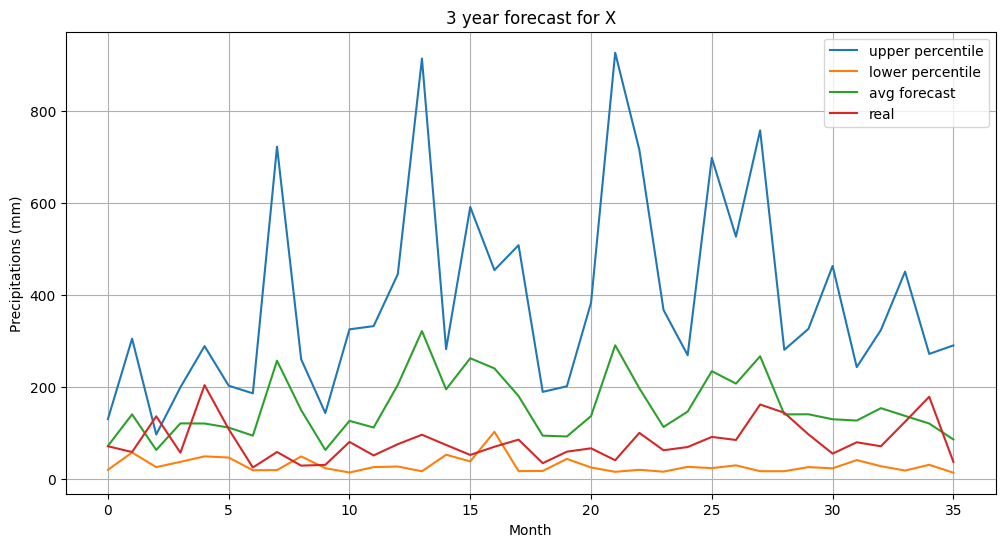

In [67]:

# FORECASTING X WITH THE FITTED log - SARIMA - GARCH MODEL
def forecast_X(X_past,time_horizon):
    forecasted_X=[]
   
    # log(X)
    logged_X=[np.log(x) for x in X_past]
    
    for i in range(time_horizon):
        mean=sarima_model.predictions(sarima_model.parameters,logged_X)[-1]
        vol=np.sqrt(garch_results.forecast(horizon=i+1).variance.values[-1, 0])
        sample = np.random.normal(0, 1)
        value=mean+sample*vol
        logged_X.append(value)
        forecasted_X.append(np.exp(value))

   
    return forecasted_X


def confidence_interval(data, confidence_level=0.95):
    if len(data) < 2:
        raise ValueError("Data must contain at least two values for confidence interval calculation.")
    
    # Sort the data
    data_sorted = np.sort(data)
    
    # Calculate the percentiles corresponding to the confidence level
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    
    # Get the quantiles using np.percentile
    lower_bound = np.percentile(data_sorted, lower_percentile * 100)
    upper_bound = np.percentile(data_sorted, upper_percentile * 100)
    avg=np.mean(data)
    
    return (avg,lower_bound, upper_bound)
# forecast trajectories
forecasts=[]
for i in range(5):
    forez=forecast_X(X_total[:700],36)
    forecastx=[float(x) for x in forez]
    forecasts.append(forecastx)
# confidence interval of trajectories
upper_forecast=[]
lower_forecast=[]
avg_forecast=[]
for i in range(len(forecasts[0])):
    section=[x[i] for x in forecasts]
    bounds=confidence_interval(section)
    avg_forecast.append(bounds[0])
    lower_forecast.append(bounds[1])
    upper_forecast.append(bounds[2])
# picture of forecast
plt.figure(figsize=(12, 6))
plt.plot(upper_forecast,label='upper percentile')
plt.plot(lower_forecast,label='lower percentile')
plt.plot(avg_forecast,label='avg forecast')
plt.plot(X_total[700:736],label='real')


plt.title('3 year forecast for X')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\utente\AppData\Local\Temp\ipykernel_15540\1632120449.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_predicted = [float(x) for x in a]


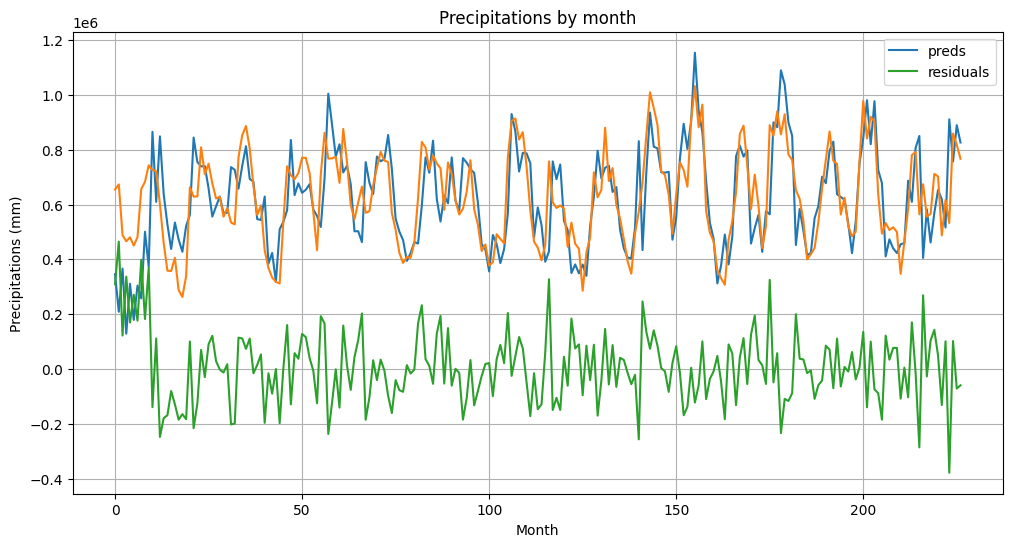

In [77]:
# CALIBRATION OF A SARIMAX MODEL FOR Y 
# Sarimax for prediction of Y
model=Sarimax(8,2,1,1,1,1,12,8)

model.fit(Y,X)
a=model.predictions(model.parameters,Y[:-1],X[1:])
Y_predicted = [float(x) for x in a]
Y_real=Y[1:]
# residuals for Garch model
sarimax_residuals=[Y_real[i]-Y_predicted[i] for i in range(len(Y_real))]


plt.figure(figsize=(12, 6))
plt.plot(Y_predicted,label='preds')
plt.plot(Y_real)
plt.plot(sarimax_residuals,label='residuals')
plt.title('Precipitations by month')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\utente\AppData\Local\Temp\ipykernel_15540\2440709510.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\AppData\Local\Temp\ipykernel_15540\2440709510.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\AppData\Local\Temp\ipykernel_15540\2440709510.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  forecastx=[float(x) for x in forez]
C:\Users\utente\

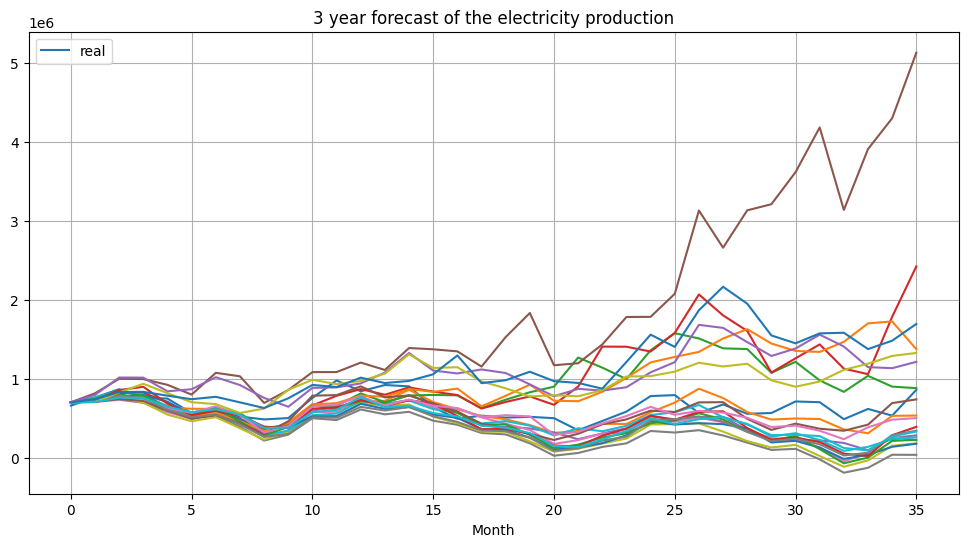

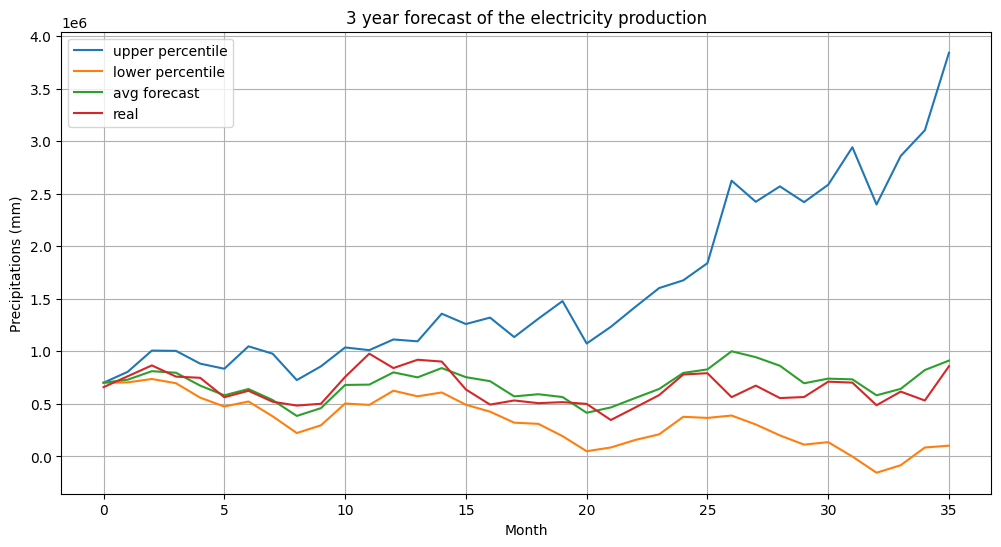

In [80]:
# FORECASTING Y WITH THE FITTED SARIMAX 

def forecast_Y(Y_past,X_past,time_horizon):
    forecasted_Y=[]
    X_series=X_past
    Y_series=Y_past
    
    for i in range(time_horizon):
        
        forecasted=forecast_X(X_series,1)
        X_series.append(forecasted[0])
        
       
        value=model.predictions(model.parameters,Y_series,X_series[1:])[-1]
        
        Y_series.append(value)
        forecasted_Y.append(value)

   
    return forecasted_Y
# forecast trajectories
forecasts=[]
# picture of trajectories
plt.figure(figsize=(12, 6))


plt.plot(Y[190:226],label='real')



for i in range(20):
    
    X_past=X[:190]
    Y_past=Y[:190]
    forez=forecast_Y(Y_past,X_past,36)
    forecastx=[float(x) for x in forez]
    forecasts.append(forecastx)
    plt.plot(forecastx)

plt.title('3 year forecast of the electricity production')
plt.xlabel('Month')

plt.legend()
plt.grid(True)
plt.show()
# confidence interval of trajectories
upper_forecast=[]
lower_forecast=[]
avg_forecast=[]
for i in range(len(forecasts[0])):
    section=[x[i] for x in forecasts]
    bounds=confidence_interval(section)
    avg_forecast.append(bounds[0])
    lower_forecast.append(bounds[1])
    upper_forecast.append(bounds[2])


# picture of forecast
plt.figure(figsize=(12, 6))
plt.plot(upper_forecast,label='upper percentile')
plt.plot(lower_forecast,label='lower percentile')
plt.plot(avg_forecast,label='avg forecast')
plt.plot(Y[190:226],label='real')


plt.title('3 year forecast of the electricity production')
plt.xlabel('Month')
plt.ylabel('Precipitations (mm)')
plt.legend()
plt.grid(True)
plt.show()